In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [5]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
print(df.shape)

(10000, 14)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.duplicated().sum()

0

In [10]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [11]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [13]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [22]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [21]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [20]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [26]:
model = Sequential()
model.add(Dense(3,activation='sigmoid',input_dim = 11))
model.add(Dense(1,activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [29]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.4962 - accuracy: 0.7972 - val_loss: 0.4894 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7972 - val_loss: 0.4739 - val_accuracy: 0.7975
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.7972 - val_loss: 0.4622 - val_accuracy: 0.7975
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4532 - accuracy: 0.7972 - val_loss: 0.4534 - val_accuracy: 0.7975
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.7972 - val_loss: 0.4465 - val_accuracy: 0.7975
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4389 - accuracy: 0.7972 - val_loss: 0.4416 - val_accuracy: 0.7975
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.7970 - val_loss: 0.4378 - val_accuracy: 0.7981

In [30]:
model.layers[0].get_weights()

[array([[ 0.13520136, -0.03846519,  0.17160024],
        [-3.0169568 ,  0.18403809, -3.1285005 ],
        [ 0.28899714,  0.14820646, -0.18433207],
        [ 0.1181984 , -0.45258313, -0.12172639],
        [-0.0884872 ,  0.14098488,  0.1177784 ],
        [ 0.11007638,  0.20747612, -0.21835504],
        [-0.59393364,  2.0627475 , -0.98275447],
        [-0.17043486, -0.13441558,  0.19445042],
        [-0.73763937, -0.667636  ,  0.03420909],
        [ 0.21138711, -0.06917408, -0.26033977],
        [-0.11849327,  0.79819643,  0.18038267]], dtype=float32),
 array([ 0.59555566, -0.17831227,  0.28487536], dtype=float32)]

In [31]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [32]:
y_pred = np.where(y_log>0.5,1,0)

In [33]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8325

In [35]:
import matplotlib.pyplot as plt

In [36]:
history.history

{'loss': [0.4961943030357361,
  0.47769612073898315,
  0.4639025926589966,
  0.45318603515625,
  0.44505536556243896,
  0.4389285743236542,
  0.4345000088214874,
  0.43109360337257385,
  0.42864012718200684,
  0.4266853630542755,
  0.42513778805732727,
  0.42382296919822693,
  0.42279016971588135,
  0.4217928647994995,
  0.4208807349205017,
  0.4200807213783264,
  0.4192730188369751,
  0.41858425736427307,
  0.4178520441055298,
  0.4172559976577759,
  0.4166952073574066,
  0.41615432500839233,
  0.41553059220314026,
  0.41507095098495483,
  0.41461384296417236,
  0.4141066074371338,
  0.4137255847454071,
  0.41333168745040894,
  0.4129444360733032,
  0.41262221336364746,
  0.4122295081615448,
  0.4119589626789093,
  0.4115913510322571,
  0.41130656003952026,
  0.4110931158065796,
  0.41077721118927,
  0.4105836749076843,
  0.4102911651134491,
  0.4100366532802582,
  0.40980666875839233,
  0.4095773994922638,
  0.4093764126300812,
  0.4092431962490082,
  0.40897083282470703,
  0.4088261

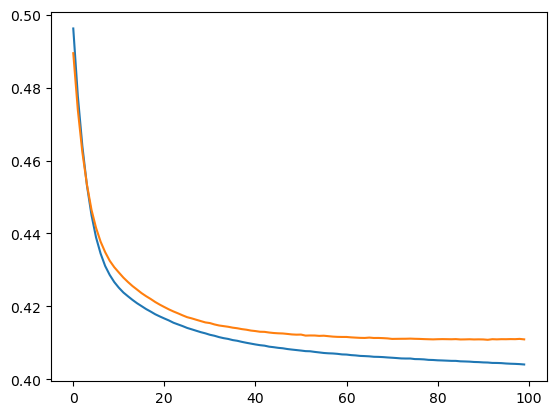

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

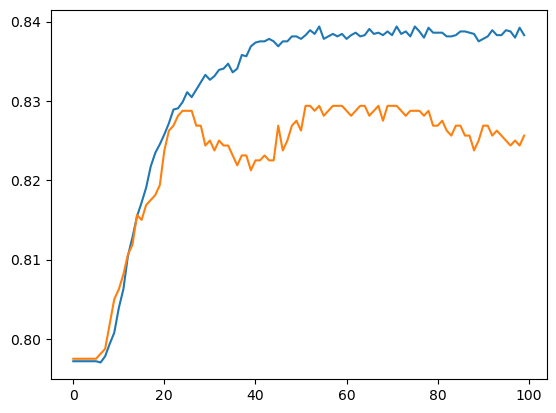

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])